# Projeto

## Circuito

![Circuito](img/circuito.jpg)

## Simula√ß√£o

In [404]:
# Vamos importar os m√≥dulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt # type: ignore

Como ponto de partida, esoclhemos valores que, al√©m de possu√≠rem  sentido do ponto de vista f√≠sico para nosso projeto, tamb√©m cumpriam alguns requisitos para o funcionamento da nossa aplica√ß√£o escolhida.

V2_continua = 5V
corrente = 2A



In [405]:
# Declarando vari√°veis 

#Resistores 
R1 = R2 = 0.5

#Resistor de carga
Rc= 3

#Indutores
L1 = L2 = L = 0

#Capacitores
C1 = C2 = 0.1e-6

Ufonte = 10

#lista do coefici√™nte de acoplamento
PossiveisK = np.linspace(0,1,500)
kFixo = 0.2

PossiveisFreq = np.arange(1e-3,100e3,500)

In [406]:
def CalcularTransformador(k, f):

    # Indut√¢ncia aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reat√¢ncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reat√¢ncia equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no prim√°rio e secund√°rio
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

def ressonancia (L, C):
    f = 1/(2*pi*sqrt(L*C))
    return f.real

### Escolha dos componentes 

Sabendo os valores dos capacitores dispon√≠veis no laborat√≥rio, plotamos um gr√°fico de tens√£o pela frequ√™ncia para cada valor de capacit√¢ncia poss√≠vel, a fim de escolhermos nossa frequ√™ncia e a capacit√¢ncia para o projeto.




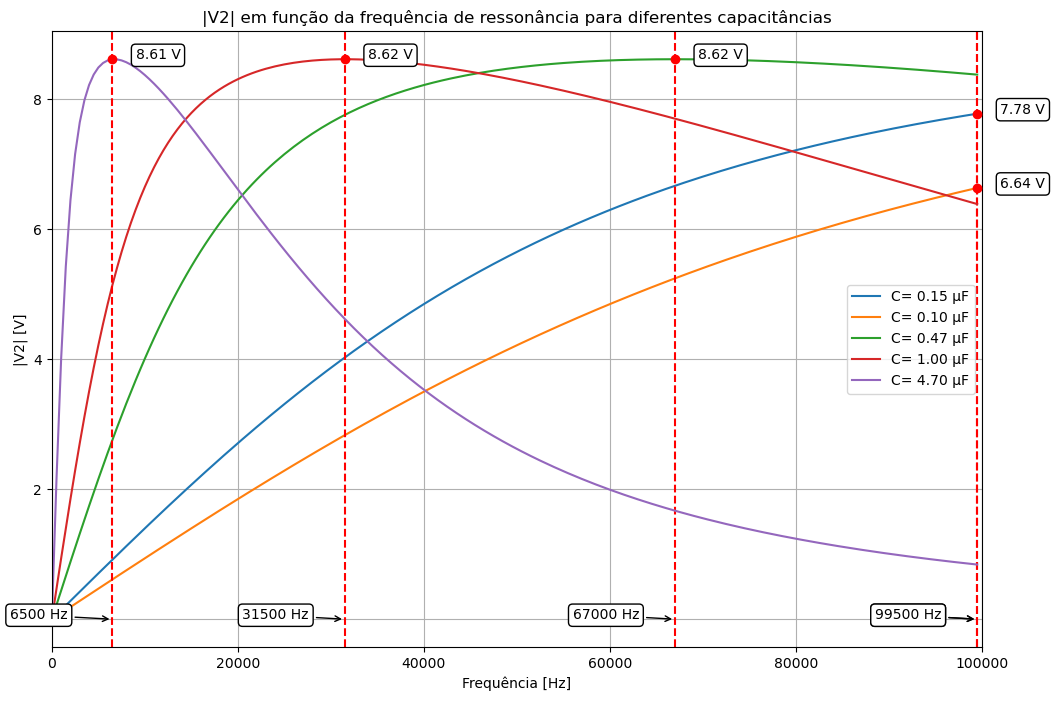

In [407]:
plt.figure(figsize=(12,8))

listaC = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6] #lista de capacitores
listaV2total = []                                #lista da tens√£o no secund√°rio
listaFreqMax = []                                #lista da frequ√™ncia m√°xima 


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C) #Indut√¢ncia para resson√¢ncia
        rdc = R1 + ((2*R1)/(100*10**3))*f
        i1, i2, ic , V2 = CalcularTransformador(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f

    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)
    
    plt.axvline(x=freqMax, ymin=0, ymax=1, c='r', ls='--')
    plt.annotate(f'{freqMax:.0f} Hz', (freqMax, 0), xytext=(freqMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(freqMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (freqMax, maxV2), xytext=(freqMax+2500, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} ¬µF')


plt.title("|V2| em fun√ß√£o da frequ√™ncia de resson√¢ncia para diferentes capacit√¢ncias")
plt.xlabel("Frequ√™ncia [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

In [408]:
C = 0.47e-6 ## capacitor de 0.47uF foi o escolhido
freq = listaFreqMax[2] #freq de resson√¢ncia do capacitor de 0.47uF

w = 2*math.pi*freq
L1 = L2 = 1/((w**2)*C) #indut√¢ncia ideal

print(f'A indut√¢ncia ideal √© de {L1*1e6:0.2f} ¬µH')

A indut√¢ncia ideal √© de 12.01 ¬µH


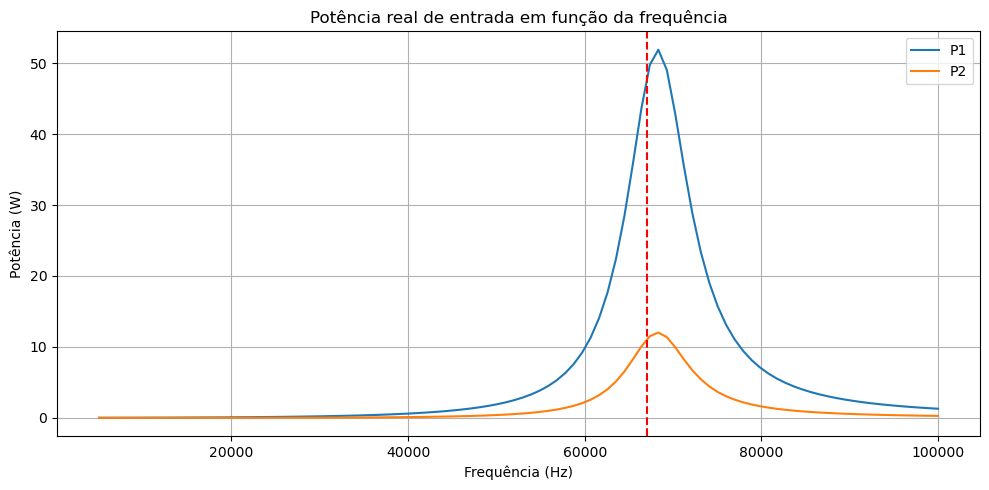

In [409]:

V1 = 10 * (2 / pi)
Rc = 2.5
capacitores = [0.1e-6, 0.15e-6, 0.47e-6, 1e-6, 4.7e-6]
C1 = C2 = capacitores[2]
freqs = np.linspace(5e3, 100e3, 100)

lista_P1 = []
lista_P2 = []
lista_eficiencia = []

for f in freqs:
    w = 2 * np.pi * f
    I1, I2, ic, V2 = CalcularTransformador(kFixo, f)
    P1 = (V1 / np.sqrt(2)) * (I1.conjugate() / np.sqrt(2))
    lista_P1.append(P1.real)
    P2 = (V2 / np.sqrt(2)) * (I2.conjugate() / np.sqrt(2))
    lista_P2.append(P2.real)
    lista_eficiencia.append(P2.real / P1.real)

plt.figure(figsize=(10, 5))


plt.plot(freqs, lista_P1, label='P1')
plt.plot(freqs, lista_P2, label='P2')
plt.title("Pot√™ncia real de entrada em fun√ß√£o da frequ√™ncia")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Pot√™ncia (W)")
#linha onde f = 67 000 Hz
plt.axvline(x=67000, ymin=0, ymax=1, c='r', ls='--')
plt.legend()
plt.grid()





plt.tight_layout()
plt.show()

In [410]:
plt.plot(freqs, lista_eficiencia)
plt.title("Efici√™ncia em fun√ß√£o da frequ√™ncia")
plt.xlabel("Frequ√™ncia (Hz)")
plt.ylabel("Efici√™ncia")
plt.grid()
#linha onde f = 67 000 Hz
plt.axvline(x=67000, ymin=0, ymax=1, c='r', ls='--')
plt.savefig('img/eficienciavsfreq.png')
plt.show()

In [411]:
print(f'A efici√™ncia m√°xima √© de {max(lista_eficiencia)*100:.2f}% em {freqs[lista_eficiencia.index(max(lista_eficiencia))]:.0f} Hz')
print(f'a eficiencia para a frequencia de 67 000 Hz √© de {lista_eficiencia[lista_eficiencia.index(max(lista_eficiencia))]:.2f}')
print(f'A pot√™ncia m√°xima em P1 √© de {max(lista_P1):.2f} W')
print(f'A potencia de entrada em P2 √© de {max(lista_P2):.2f} W')

A efici√™ncia m√°xima √© de 23.24% em 73131 Hz
a eficiencia para a frequencia de 67 000 Hz √© de 0.23
A pot√™ncia m√°xima em P1 √© de 51.90 W
A potencia de entrada em P2 √© de 12.02 W


####  Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor ùëÖùê∂) com o coeficiente de acoplamento k 

Para essa atividade, use a frequ√™ncia de resson√¢ncia natural do conjunto ùêøùê∂, que ficar√° fixa para diferentes valores de ùëò. 

A ideia, com a simula√ß√£o, √© identificar se existe um fator de acoplamento √≥timo, com o qual a tens√£o no secund√°rio √© m√°xima (e, por conseguinte, a pot√™ncia recebida tamb√©m ser√° m√°xima).

In [412]:
V1 = 10 * (2 / np.pi)

freq = ressonancia(L1, C1) 

ks = np.arange(0.1, 1, 0.01)

voltagens_secundario = []
Potencias_secundario = []


for k in ks:
    i1,i2,ic ,V2_peak = CalcularTransformador(k, freq)
    P2 = V2_peak/Rc
    voltagens_secundario.append(V2_peak)
    Potencias_secundario.append(P2)

# Identifique os √≠ndices dos m√°ximos
idx_max_volt = np.argmax(voltagens_secundario)
idx_max_power = np.argmax(Potencias_secundario)

# Imprima os valores de k para m√°ximos
k_max_volt = ks[idx_max_volt]
k_max_power = ks[idx_max_power]

print(f"Valor de k onde a tens√£o de pico secund√°ria √© m√°xima: {k_max_volt:.2f}")
print(f"Valor de k onde a pot√™ncia no secund√°rio √© m√°xima: {k_max_power:.2f}")

plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
plt.plot(ks, voltagens_secundario)
plt.title("Tens√£o de pico secund√°ria em fun√ß√£o do coeficiente de acoplamento")
plt.axvline(x=ks[idx_max_volt], color='r', linestyle='--', label="M√°x. Tens√£o")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Tens√£o de Pico no Secund√°rio (V)")
plt.grid()

plt.subplot(1,2,2)
plt.plot(ks,Potencias_secundario)
plt.title('Pot√™ncia em func√£o do coeficiente de acoplamento')
plt.axvline(x=ks[idx_max_power], color='r', linestyle='--', label="M√°x. Pot√™ncia")
plt.xlabel("Coeficiente de Acoplamento (k)")
plt.ylabel("Pot√™ncia no secund√°rio (W)")
plt.grid()
plt.show()



Valor de k onde a tens√£o de pico secund√°ria √© m√°xima: 0.25
Valor de k onde a pot√™ncia no secund√°rio √© m√°xima: 0.25


# Trabalhando com os valores reais

In [413]:
R1 = 0.124
R2 = 0.097

L1 = 14.13e-6
L2 = 10.69e-6

C1 = C2 = 0.47e-6

f = 67000

Ufonte = 10*2/pi


In [414]:
plt.figure(figsize=(12,8))

listaR = [0.5,2.5,5,10,20,50,500]
listaV2total = []
listaKMax = []
listaMaxV2 = []


for R in listaR:
    Rc = R
    listaV2 = []
    maxV2 = 0
    kMax = 0

    for k in PossiveisK:
        w = 2*math.pi*f
        i1, i2, ic , V2 = CalcularTransformador(k, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            kMax = k

    listaV2total.append(listaV2)
    listaKMax.append(kMax)
    listaMaxV2.append(maxV2)
    
    # plt.axvline(x=kMax, ymin=0, ymax=1, c='r', ls='--')
    # plt.annotate(f'{kMax:.0f} Hz', (kMax, 0), xytext=(kMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(kMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (kMax, maxV2), xytext=(kMax+0.03, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisK, listaV2, label=f'Rc= {Rc} ')

plt.plot(listaKMax, listaMaxV2, color='red', linestyle='--')

plt.title("Tens√µes de pico em fun√ß√£o de k")
plt.xlabel("Coeficiente de acoplamento magn√©tico (k)")
plt.ylabel("Tens√£o de pico em V")
plt.xlim(0,1)
plt.grid(True)
plt.legend()
plt.savefig('img/kpossiveis.png')
plt.show()

In [415]:
L = 12e-6
C = 0.47e-6

f_ressonancia = 1/(2*math.pi*math.sqrt(L*C))

print(f"Frequ√™ncia de Resson√¢ncia: {f_ressonancia:.2f} Hz")

Frequ√™ncia de Resson√¢ncia: 67016.32 Hz


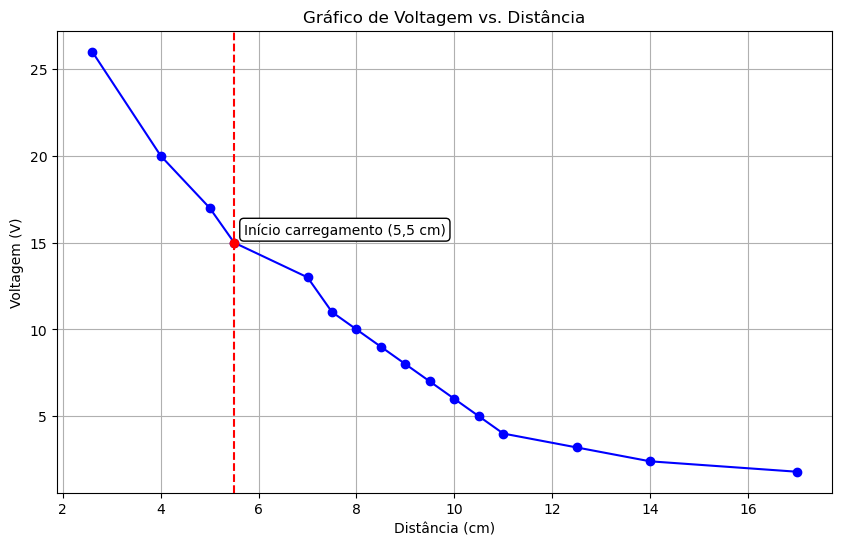

In [416]:
distancia = [17, 14, 12.5, 11, 10.5, 10, 9.5, 9, 8.5, 8, 7.5, 7, 5.5, 5, 4, 2.6]
voltagem = [1.8, 2.4, 3.2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 26]
inicio_carregamento = 5.5
v2_inicio_carregamento = 15

plt.figure(figsize=(10, 6))
plt.plot(distancia, voltagem, marker='o', linestyle='-', color='b')
plt.scatter(inicio_carregamento, v2_inicio_carregamento, color='red', zorder=5)
plt.axvline(x=inicio_carregamento, ymin=0, ymax=1, c='r', ls='--')
plt.annotate(f'In√≠cio carregamento (5,5 cm)', (inicio_carregamento, v2_inicio_carregamento), xytext=(inicio_carregamento+0.2, v2_inicio_carregamento+0.5), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))
plt.title('Gr√°fico de Voltagem vs. Dist√¢ncia')
plt.xlabel('Dist√¢ncia (cm)')
plt.ylabel('Voltagem (V)')
plt.grid(True)
plt.show()